In [275]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

# I. Data Cleaning

In [276]:
df = pd.read_csv('./../datasets/main.csv')

In [277]:
df.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out
0,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-12-19 10:21:00,2014-12-20 16:35:00,...,0,7.0,7.0,Neutered Male,Neutered Male,1,1,8700 Research Blvd in Austin (TX),Scamp,Scamp
1,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-03-07 14:26:00,2014-03-08 17:10:00,...,0,6.0,6.0,Neutered Male,Neutered Male,1,1,8700 Research in Austin (TX),Scamp,Scamp
2,A047759,Dog,tricolor,dachshund,Owner Surrender,Transfer,Normal,Partner,2014-04-02 15:55:00,2014-04-07 15:12:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,Austin (TX),Oreo,Oreo
3,A134067,Dog,brown white,sheepdog shetland,Public Assist,Return to Owner,Injured,Unknown,2013-11-16 09:02:00,2013-11-16 11:54:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,12034 Research Blvd in Austin (TX),Bandit,Bandit
4,A141142,Dog,white black,retriever labrador bull pit,Stray,Return to Owner,Aged,Unknown,2013-11-16 14:46:00,2013-11-17 11:40:00,...,0,1.0,1.0,Spayed Female,Spayed Female,1,1,Austin (TX),Bettie,Bettie


### Creating new columns

In [278]:
df['mix'] = df['breed'].str.contains("mix").astype(int)
df['sex'] = df['sex_upon_intake'].str.contains("Male").map({True: 'Male', False:'Female'})
df['is_neutered'] = df['sex_upon_intake'].str.split(' ').str[0]
df['is_neutered'] = (df['is_neutered'] != 'Intact').map({True: 'Neutered/Spayed', False:'Intact'})

df[['datetime_in','datetime_out']] = df[['datetime_in','datetime_out']].apply(pd.to_datetime)
df['days_in_shelter'] = (df['datetime_out'] - df['datetime_in']).dt.days

In [279]:
bins = [0, 0.5, 2, 6, 10, 14, np.inf]
names = ['< 6 Months ', '6 Months-2 Years', '2 Years-6 Years', 
         '6 Years-10 Years', '10 Years-14 Years', '14 Years+']


df['age_type'] = pd.cut(df['age_upon_intake'], bins, labels=names)

In [280]:
df.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,is_named_in,is_named_out,found_location,name_in,name_out,mix,sex,is_neutered,days_in_shelter,age_type
0,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-12-19 10:21:00,2014-12-20 16:35:00,...,1,1,8700 Research Blvd in Austin (TX),Scamp,Scamp,1,Male,Neutered/Spayed,1,6 Years-10 Years
1,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-03-07 14:26:00,2014-03-08 17:10:00,...,1,1,8700 Research in Austin (TX),Scamp,Scamp,1,Male,Neutered/Spayed,1,2 Years-6 Years
2,A047759,Dog,tricolor,dachshund,Owner Surrender,Transfer,Normal,Partner,2014-04-02 15:55:00,2014-04-07 15:12:00,...,1,1,Austin (TX),Oreo,Oreo,0,Male,Neutered/Spayed,4,6 Months-2 Years
3,A134067,Dog,brown white,sheepdog shetland,Public Assist,Return to Owner,Injured,Unknown,2013-11-16 09:02:00,2013-11-16 11:54:00,...,1,1,12034 Research Blvd in Austin (TX),Bandit,Bandit,0,Male,Neutered/Spayed,0,6 Months-2 Years
4,A141142,Dog,white black,retriever labrador bull pit,Stray,Return to Owner,Aged,Unknown,2013-11-16 14:46:00,2013-11-17 11:40:00,...,1,1,Austin (TX),Bettie,Bettie,0,Female,Neutered/Spayed,0,6 Months-2 Years


In [281]:
df.drop(columns = ['animal_id_in','outcome_subtype', 'year_out', 'month_out', 
                        'day_out', 'datetime_out','name_out', 'is_named_out','sex_upon_outcome', 
                        'age_upon_outcome', 'name_in','found_location', 'datetime_in', 'sex_upon_intake',
                        'year_in'], inplace=True)

# II. EDA

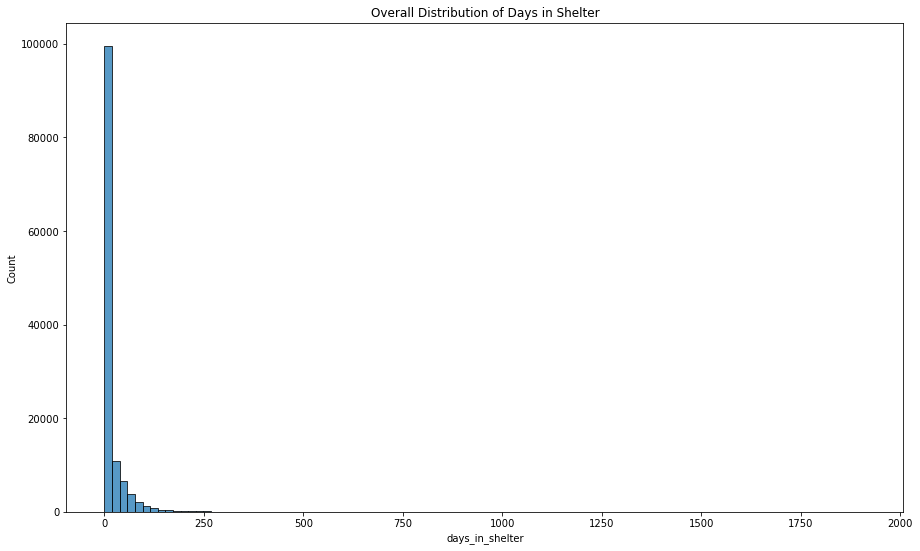

In [282]:
plt.figure(figsize=(15,9))
sns.histplot(data=df, bins=100, x="days_in_shelter").set(title='Overall Distribution of Days in Shelter')
plt.show()

/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


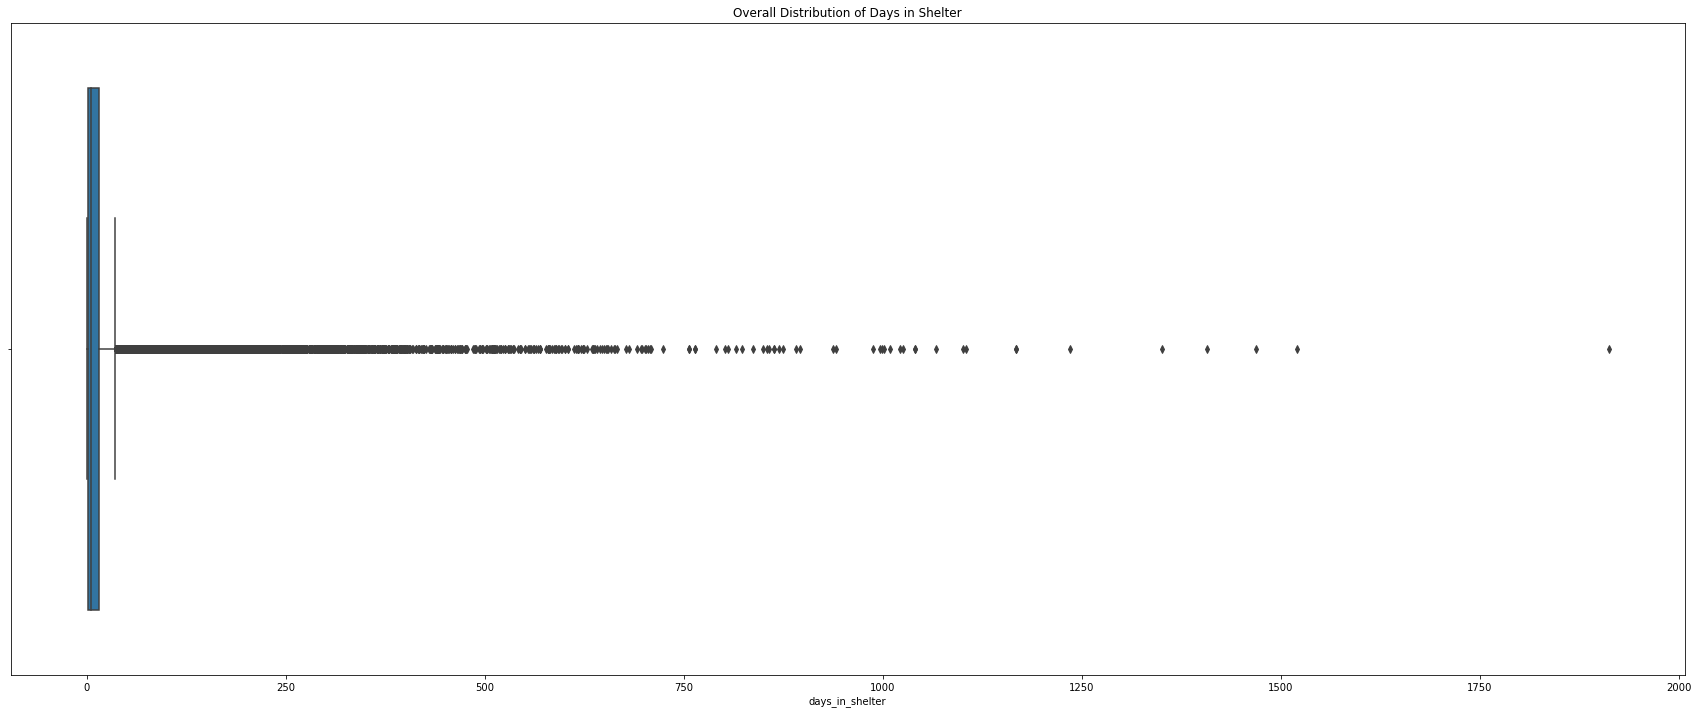

In [283]:
plt.figure(figsize=(30,12))
sns.boxplot(df['days_in_shelter']).set(title = 'Overall Distribution of Days in Shelter')
plt.show();

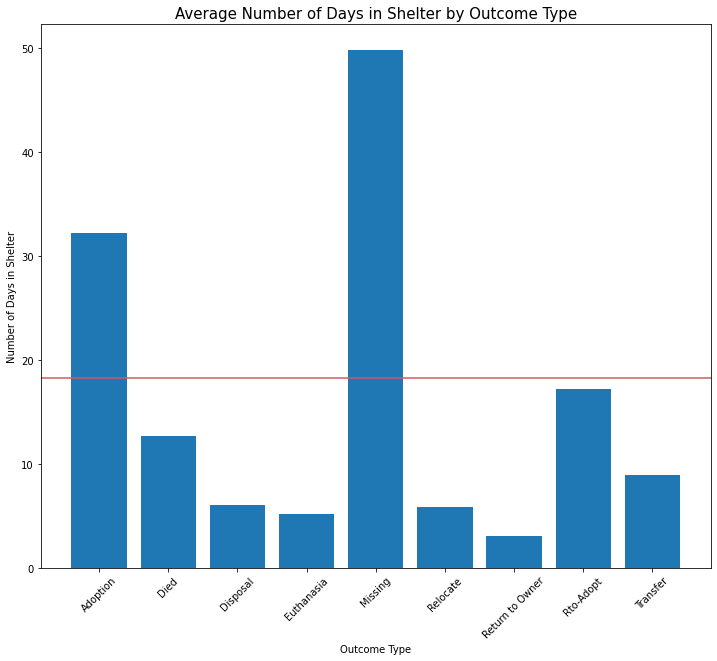

In [284]:
col_series = df['days_in_shelter'].groupby(df['outcome_type']).mean()
index = [index for index,value in col_series.items()]
mean = [value for index,value in col_series.items()]
plt.figure(figsize=(12,10))
plt.bar(index,mean)
plt.xticks(rotation=45)
plt.axhline(y=df['days_in_shelter'].mean(), color='indianred')
plt.title('Average Number of Days in Shelter by Outcome Type', fontsize=15)
plt.xlabel('Outcome Type')
plt.ylabel('Number of Days in Shelter')
plt.show();

In [285]:
df['outcome_type'].value_counts()

Adoption           57116
Transfer           37056
Return to Owner    21827
Euthanasia          8581
Died                1134
Rto-Adopt            758
Disposal             584
Missing               66
Relocate              22
Name: outcome_type, dtype: int64

In [286]:
df['days_in_shelter'].mean()

18.23974391241427

In [287]:
#Identifying amount of animals over 2 years in shelter
len(df.index[(df['days_in_shelter']> 730)])

41

In [288]:
#Removing outliers of animals in shelter longer than 2 years
#df.drop(df.index[(df['days_in_shelter']> 730)], axis=0, inplace=True)

In [289]:
# As expected, overall mean decreased slightly
df['days_in_shelter'].mean()

18.23974391241427

### Understanding Data Types

In [290]:
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

print(f'The numerical columns are: {num_cols}.')
print(f'The categorical columns are: {cat_cols}.')

The numerical columns are: Index(['month_in', 'prev_adoption', 'prev_transfer', 'prev_ret_to_owner',
       'prev_rto_adopt', 'prev_disposal', 'prev_missing', 'prev_relocate',
       'age_upon_intake', 'is_named_in', 'mix', 'days_in_shelter', 'age_type'],
      dtype='object').
The categorical columns are: Index(['animal_type', 'color', 'breed', 'intake_type', 'outcome_type',
       'intake_condition', 'day_in', 'sex', 'is_neutered'],
      dtype='object').


In [291]:
# Changing year_in, month_in to categorical
df['month_in'] = df['month_in'].astype(str)

### Further Investigating

In [292]:
for col in cat_cols:
    print(df[col].value_counts())

Dog          71953
Cat          47770
Other         6803
Bird           598
Livestock       20
Name: animal_type, dtype: int64
white black                 16795
black                       10756
brown tabby                  7226
brown white                  6714
tan white                    5777
                            ...  
tiger black smoke               1
red merle sable                 1
lynx blue point                 1
brown tick liver brindle        1
gray agouti                     1
Name: color, Length: 373, dtype: int64
domestic shorthair mix                               30788
pit bull mix                                          8431
domestic shorthair                                    8306
retriever labrador mix                                6907
chihuahua shorthair mix                               6223
                                                     ...  
sharpei shiba inu chinese                                1
ibizan of hound glen imaal                     

In [293]:
for col in cat_cols:
    temp = df['days_in_shelter'].groupby(df[col]).mean()
    print(temp)

animal_type
Bird          7.988294
Cat          22.071802
Dog          17.127083
Livestock    75.400000
Other         3.832721
Name: days_in_shelter, dtype: float64
color
agouti                  21.954545
agouti cream             4.000000
apricot                  5.935897
black                   20.275009
black buff               8.781250
                          ...    
yellow gray              5.583333
yellow orange            8.666667
yellow orange tabby      0.000000
yellow white            13.225275
yellow white brindle    24.941176
Name: days_in_shelter, Length: 373, dtype: float64
breed
abyssinian                        7.000000
abyssinian domestic shorthair    36.000000
abyssinian mix                   49.000000
affenpinscher                     6.000000
affenpinscher border terrier      5.000000
                                   ...    
yorkshire silky terrier           2.250000
yorkshire terrier                 5.627907
yorkshire terrier dachshund       4.000000
yorkshire t

### Bar Charts

In [294]:
interest_cols = ['animal_type','intake_type', 'intake_condition', 'day_in', 'month_in','sex','is_neutered']

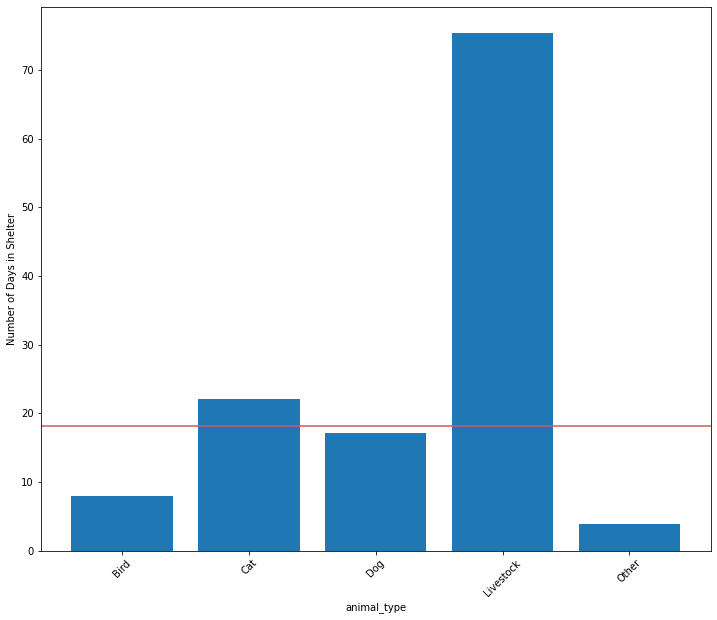

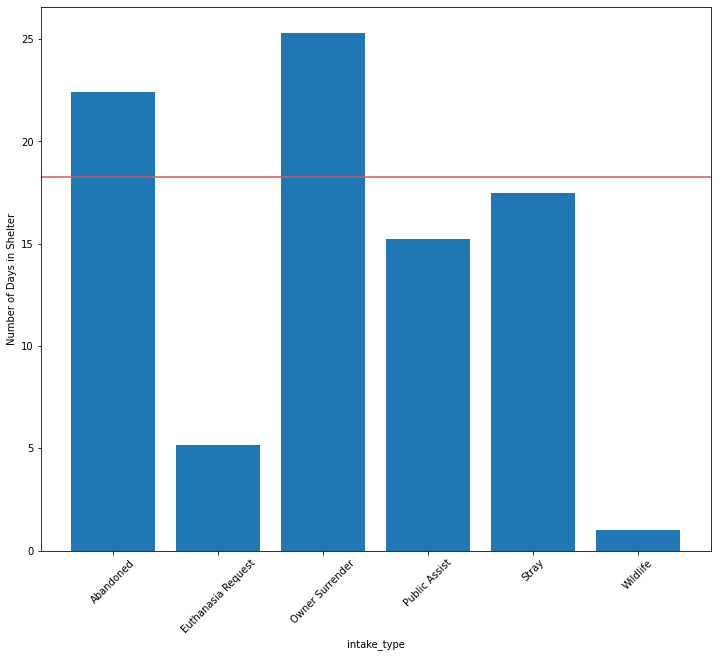

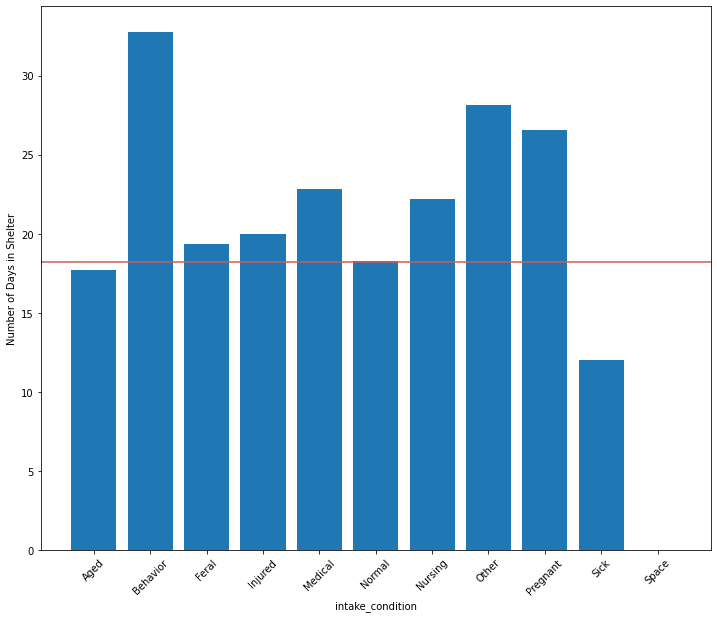

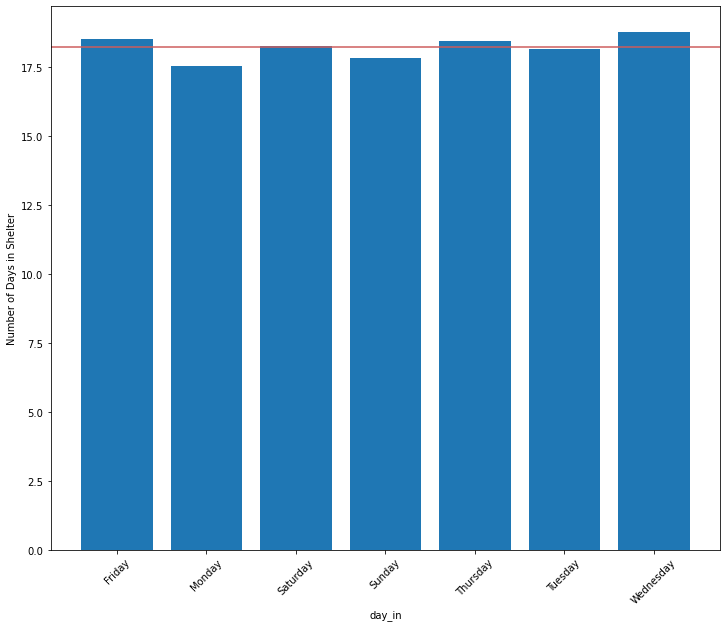

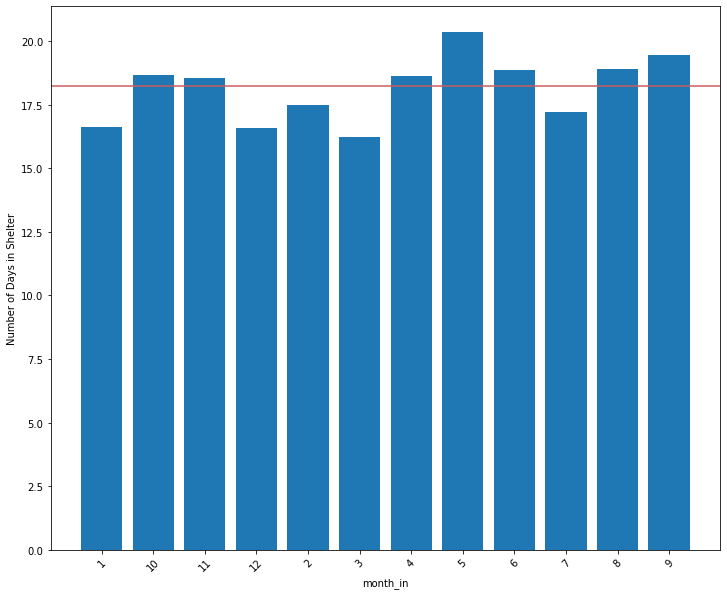

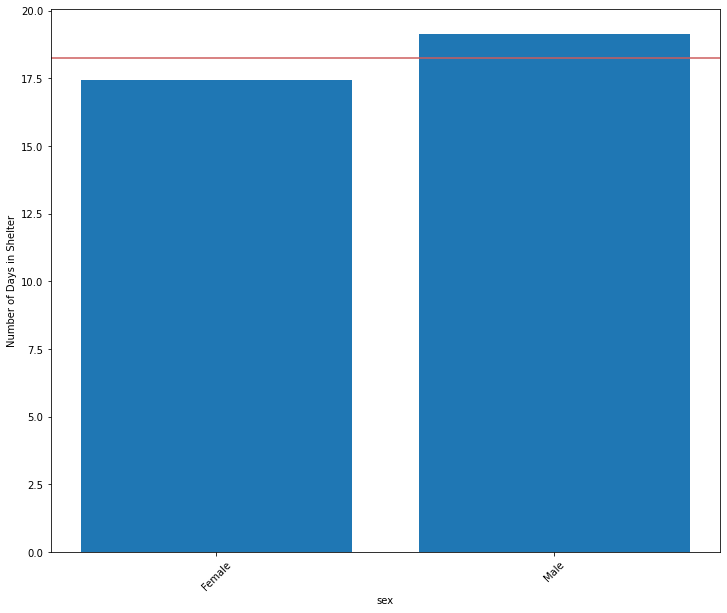

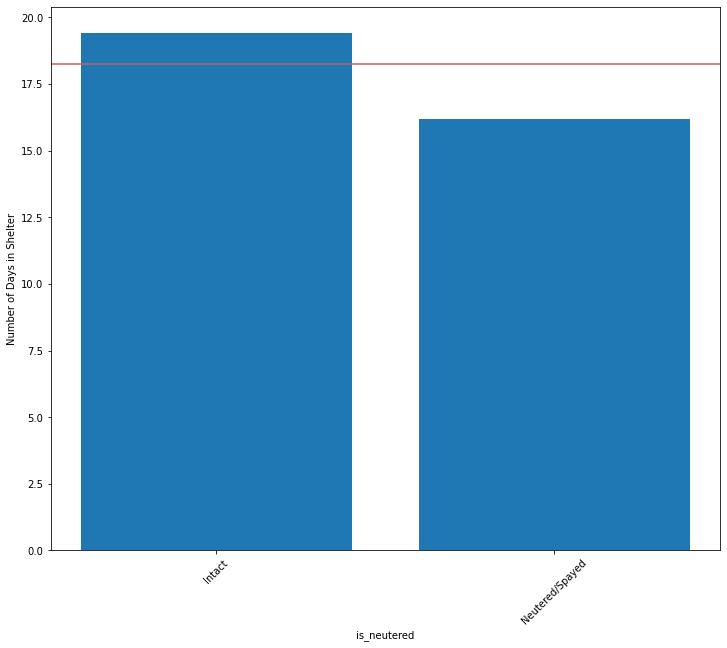

In [295]:
for col in interest_cols:
    col_series = df['days_in_shelter'].groupby(df[col]).mean()
    index = [index for index,value in col_series.items()]
    mean = [value for index,value in col_series.items()]
    plt.figure(figsize=(12,10))
    plt.bar(index,mean)
    plt.xticks(rotation=45)
    plt.axhline(y=df['days_in_shelter'].mean(), color='indianred')
    plt.xlabel(col)
    plt.ylabel('Number of Days in Shelter')
    plt.show();

### Heatmap

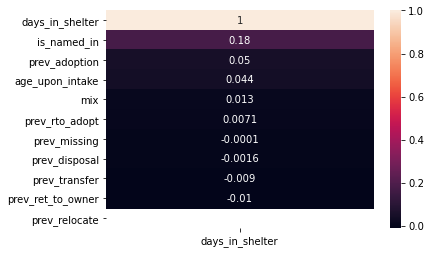

In [296]:
# Heatmap BEFORE getting dummies
sns.heatmap(df.corr()[['days_in_shelter']].sort_values('days_in_shelter', ascending=False), annot=True);

The null correlations are of interest to me. I will investigate this further.

In [297]:
print(df['prev_relocate'].value_counts())

0    127144
Name: prev_relocate, dtype: int64


In [298]:
df.drop(columns=['prev_relocate'], inplace=True)

### Pairplot

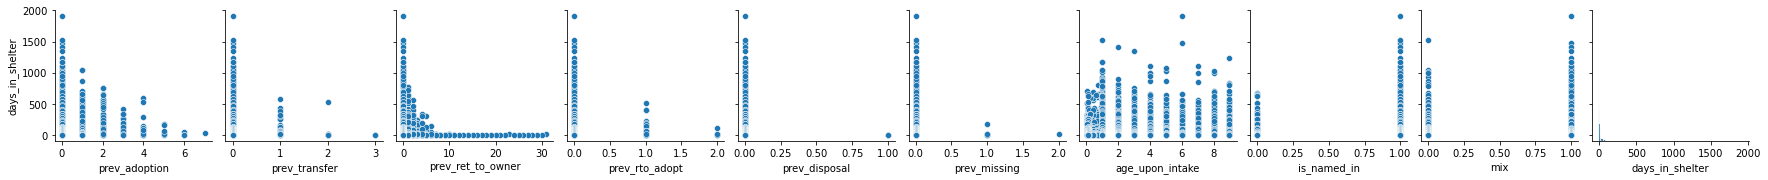

In [268]:
num_cols = df.select_dtypes(exclude='object').columns
sns.pairplot(x_vars=num_cols, y_vars=['days_in_shelter'],data=df);

### Getting Dummies

In [301]:
df.to_csv('katie-animals_w_outcome.csv', index=False)

In [270]:
df.drop(columns='outcome_type', inplace=True)

In [195]:
df_dummied = pd.get_dummies(df)

In [196]:
df_dummied

,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,age_upon_intake,is_named_in,mix,days_in_shelter,...,day_in_Monday,day_in_Saturday,day_in_Sunday,day_in_Thursday,day_in_Tuesday,day_in_Wednesday,sex_Female,sex_Male,is_neutered_Intact,is_neutered_Neutered/Spayed
0,0,0,1,0,0,0,7.000,1,1,1,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,6.000,1,1,1,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1.000,1,0,4,...,0,0,0,0,0,1,0,1,0,1
3,0,0,0,0,0,0,1.000,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1.000,1,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127139,0,0,0,0,0,0,0.083,1,1,0,...,0,0,0,0,0,0,1,0,1,0
127140,0,0,0,0,0,0,0.083,1,1,0,...,0,0,0,0,0,0,1,0,1,0
127141,0,0,0,0,0,0,2.000,0,0,0,...,0,0,0,0,0,0,1,0,0,1
127142,0,0,0,0,0,0,2.000,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# III. Modeling

In [197]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

In [198]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [199]:
features = (df_dummied.drop(columns = ['days_in_shelter']).columns)
X = df_dummied[features]
y = df_dummied['days_in_shelter']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [32]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

**Linear Regression**

In [33]:
linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression()

In [34]:
print(" Lin Reg ".center(18, "="))
print(linreg.score(X_train_sc, y_train))
print(linreg.score(X_test_sc, y_test))

==== Lin Reg =====
0.07629152289207175
-9.886777592567786e+23


In [35]:
predictions = linreg.predict(X_test_sc)
rmse(predictions, y_test)

40194846176008.1

**Ridge**

In [36]:
ridge_model = Ridge()
ridge_model.fit(X_train_sc, y_train)

print(" Ridge ".center(18, "="))
print(ridge_model.score(X_train_sc, y_train))
print(ridge_model.score(X_test_sc, y_test))

===== Ridge ======
0.10442995315013304
0.07183456447528302


In [37]:
predictions = ridge_model.predict(X_test_sc)
rmse(predictions, y_test)

38.94535656526271

**Lasso**

In [38]:
lasso = Lasso()
lasso.fit(X_train_sc, y_train);

print(" Lasso ".center(18, "="))
print(lasso.score(X_train_sc, y_train))
print(lasso.score(X_test_sc, y_test))

===== Lasso ======
0.061464197910581775
0.05924996129971816


In [39]:
predictions = lasso.predict(X_test_sc)
rmse(predictions, y_test)

39.208489462806654

**ElasticNet**

In [40]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet()
enet_model = enet_model.fit(X_train_sc, y_train)

print(" ElasticNet ".center(18, "="))
print(enet_model.score(X_train_sc, y_train))
print(enet_model.score(X_test_sc, y_test))

=== ElasticNet ===
0.06347675923480611
0.057521499436937296


In [41]:
predictions = enet_model.predict(X_test_sc)
rmse(predictions, y_test)

39.244492266681696

In [42]:
coef = (dict(list(zip(X_train.columns, lasso.coef_))))
{k: v for k, v in sorted(coef.items(), key=lambda item: item[1])}

{'intake_type_Public Assist': -0.18750497774273708,
 'breed_chihuahua shorthair mix': -0.0655361522821226,
 'is_neutered_Neutered/Spayed': -1.9844839129393466e-15,
 'prev_transfer': -0.0,
 'prev_ret_to_owner': -0.0,
 'prev_rto_adopt': 0.0,
 'prev_disposal': -0.0,
 'prev_missing': -0.0,
 'age_upon_intake': 0.0,
 'mix': -0.0,
 'animal_type_Bird': 0.0,
 'animal_type_Dog': -0.0,
 'animal_type_Other': -0.0,
 'color_agouti': 0.0,
 'color_agouti cream': -0.0,
 'color_apricot': -0.0,
 'color_black': 0.0,
 'color_black buff': -0.0,
 'color_black sable': -0.0,
 'color_black silver': -0.0,
 'color_black smoke': 0.0,
 'color_blue': -0.0,
 'color_blue black': -0.0,
 'color_blue brindle black': -0.0,
 'color_blue calico': -0.0,
 'color_blue calico tabby': -0.0,
 'color_blue chocolate tick': -0.0,
 'color_blue cream': 0.0,
 'color_blue cream buff': 0.0,
 'color_blue cream calico': -0.0,
 'color_blue cream tabby': 0.0,
 'color_blue cream tiger': -0.0,
 'color_blue fawn': -0.0,
 'color_blue gray': -0.0

# III. More DataFrames

In [43]:
dog = df[df['animal_type']== 'Dog']
cat = df[df['animal_type']== 'Cat']

In [44]:
dog

,animal_type,color,breed,intake_type,intake_condition,month_in,day_in,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,age_upon_intake,is_named_in,mix,sex,is_neutered,days_in_shelter
0,Dog,yellow white,spinone italiano mix,Public Assist,Normal,12,Friday,0,0,1,0,0,0,7.000,1,1,Male,Neutered/Spayed,1
1,Dog,yellow white,spinone italiano mix,Public Assist,Normal,3,Friday,0,0,0,0,0,0,6.000,1,1,Male,Neutered/Spayed,1
2,Dog,tricolor,dachshund,Owner Surrender,Normal,4,Wednesday,0,0,0,0,0,0,1.000,1,0,Male,Neutered/Spayed,4
3,Dog,brown white,sheepdog shetland,Public Assist,Injured,11,Saturday,0,0,0,0,0,0,1.000,1,0,Male,Neutered/Spayed,0
4,Dog,white black,retriever labrador bull pit,Stray,Aged,11,Saturday,0,0,0,0,0,0,1.000,1,0,Female,Neutered/Spayed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127136,Dog,tan black,shepherd german,Stray,Normal,8,Friday,0,0,0,0,0,0,2.000,1,0,Female,Neutered/Spayed,0
127137,Dog,tan black,mix shepherd german,Stray,Normal,8,Friday,0,0,0,0,0,0,2.000,0,1,Female,Neutered/Spayed,0
127138,Dog,buff,retriever labrador mix,Owner Surrender,Normal,8,Friday,0,0,0,0,0,0,0.083,1,1,Male,Intact,0
127139,Dog,brown,retriever labrador mix,Owner Surrender,Normal,8,Friday,0,0,0,0,0,0,0.083,1,1,Female,Intact,0


In [45]:
cat

,animal_type,color,breed,intake_type,intake_condition,month_in,day_in,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,age_upon_intake,is_named_in,mix,sex,is_neutered,days_in_shelter
10,Cat,white black,domestic longhair mix,Stray,Normal,11,Friday,0,0,0,0,0,0,1.000,1,1,Female,Intact,3
11,Cat,brown white tabby,mix shorthair american,Stray,Normal,12,Monday,0,0,0,0,0,0,1.000,1,1,Female,Neutered/Spayed,14
16,Cat,black,domestic shorthair,Euthanasia Request,Aged,12,Saturday,0,0,0,0,0,0,1.000,1,0,Female,Neutered/Spayed,0
20,Cat,tortie point,snowshoe mix,Owner Surrender,Normal,5,Wednesday,0,0,0,0,0,0,1.000,1,1,Female,Neutered/Spayed,9
27,Cat,white black,domestic shorthair mix,Stray,Normal,12,Friday,0,0,0,0,0,0,1.000,1,1,Male,Neutered/Spayed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127130,Cat,torbie,domestic shorthair,Abandoned,Nursing,8,Friday,0,0,0,0,0,0,0.038,1,0,Female,Intact,0
127132,Cat,brown tabby,domestic shorthair,Stray,Nursing,8,Friday,0,0,0,0,0,0,0.005,1,0,Female,Intact,0
127133,Cat,brown tabby,domestic shorthair,Stray,Nursing,8,Friday,0,0,0,0,0,0,0.005,1,0,Male,Intact,0
127134,Cat,black,domestic shorthair,Stray,Nursing,8,Friday,0,0,0,0,0,0,0.005,1,0,Male,Intact,0


### Deleting columns/rows

In [46]:
dog.drop(columns = ['animal_type'], inplace=True)

cat.drop(columns = ['animal_type'], inplace=True)

### EDA

In [47]:
dog['days_in_shelter'].mean()

16.773047673335466

In [48]:
cat['days_in_shelter'].mean()

21.757763584964927

In [49]:
interest_cols = ['intake_type', 'intake_condition', 'day_in', 'month_in', 'is_neutered', 'sex']

### Dog Bar Charts

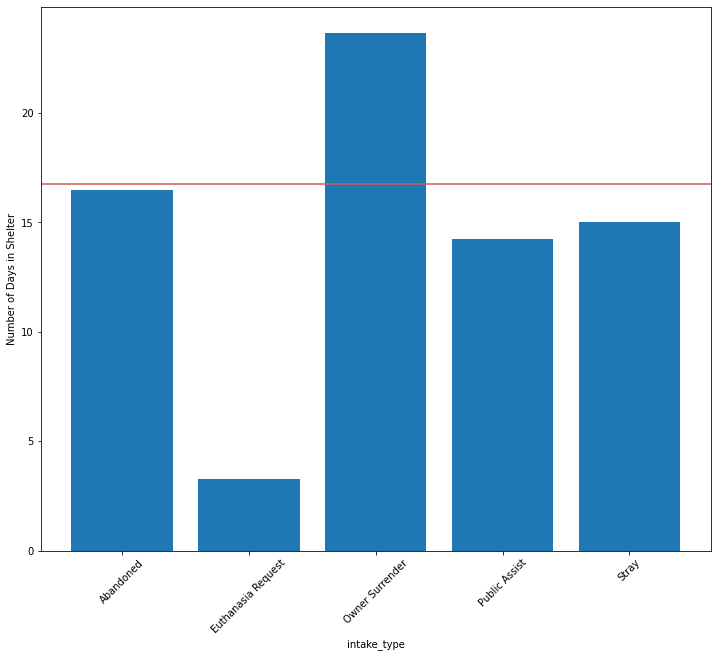

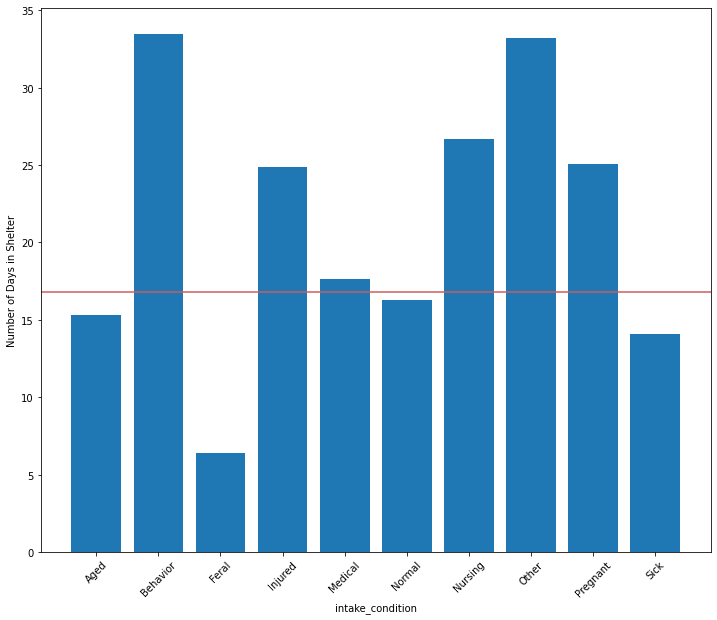

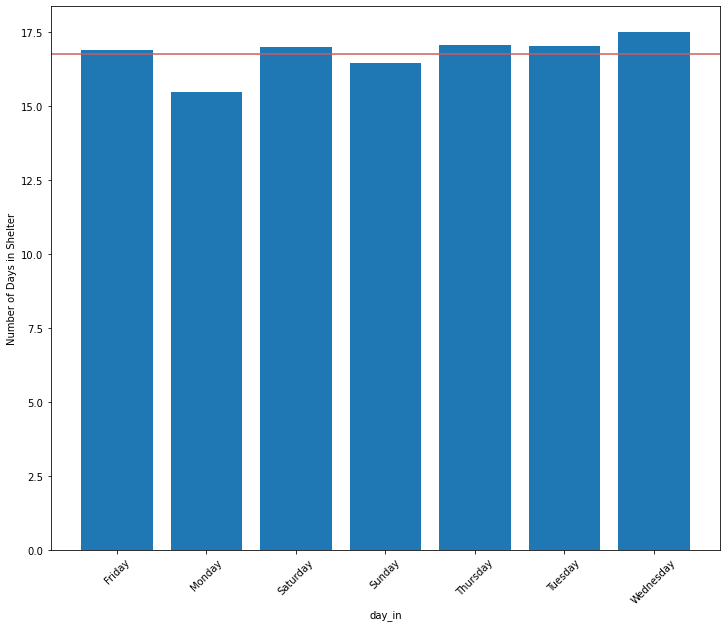

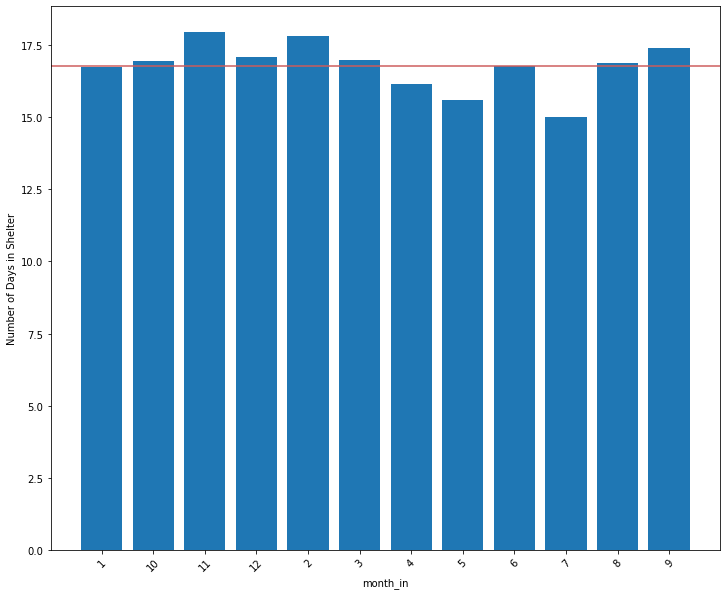

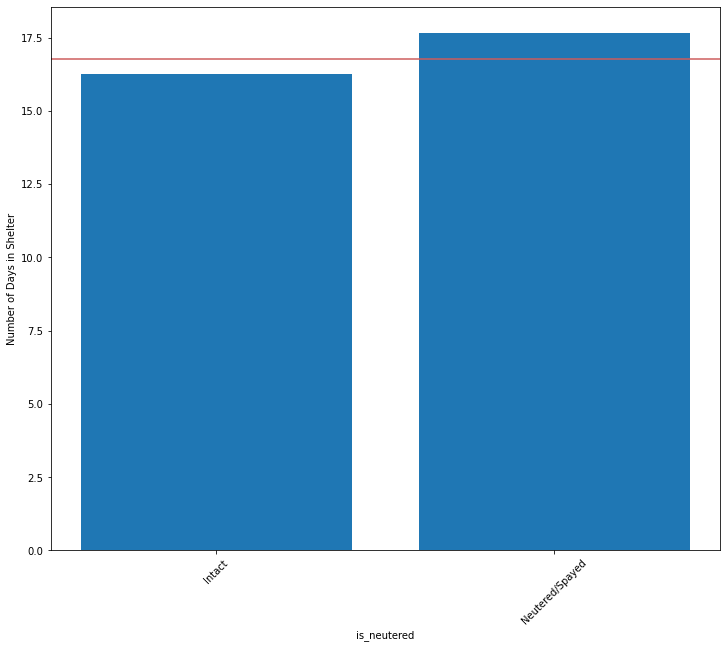

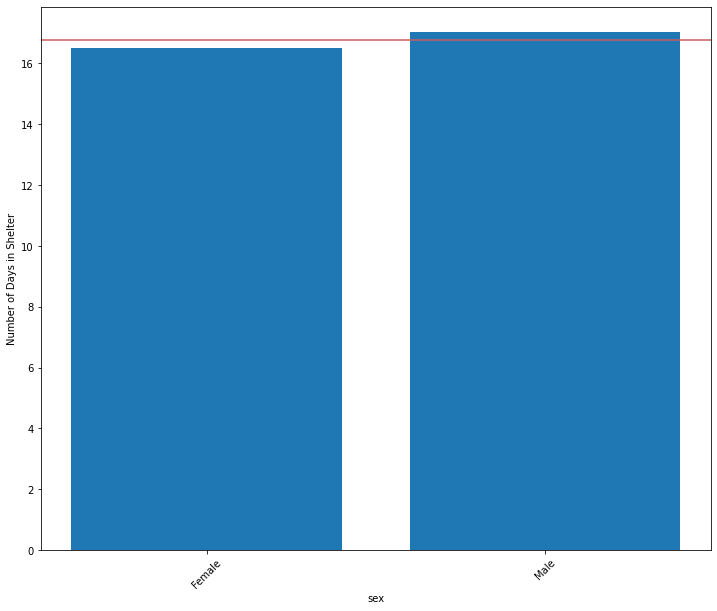

In [50]:
for col in interest_cols:
    col_series = dog['days_in_shelter'].groupby(dog[col]).mean()
    index = [index for index,value in col_series.items()]
    mean = [value for index,value in col_series.items()]
    plt.figure(figsize=(12,10))
    plt.bar(index,mean)
    plt.xticks(rotation=45)
    plt.axhline(y=dog['days_in_shelter'].mean(), color='indianred')
    plt.xlabel(col)
    plt.ylabel('Number of Days in Shelter')
    plt.show();

### Cat Bar Charts

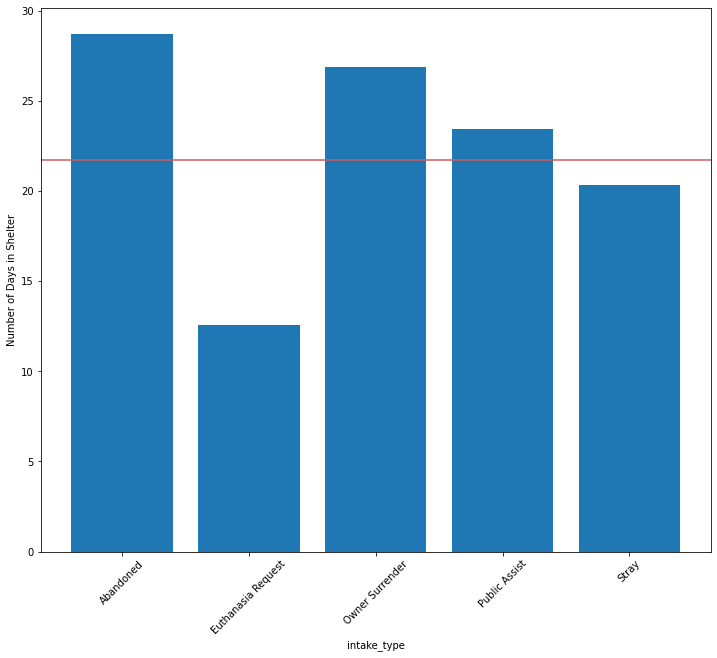

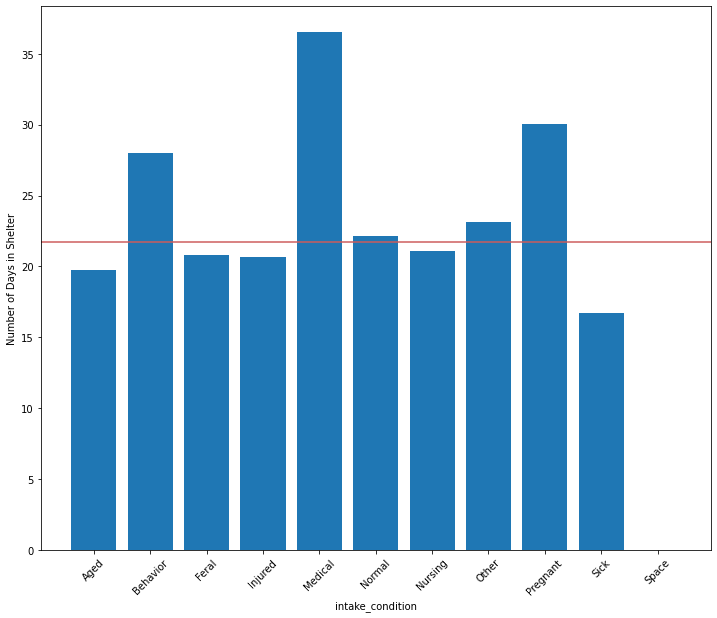

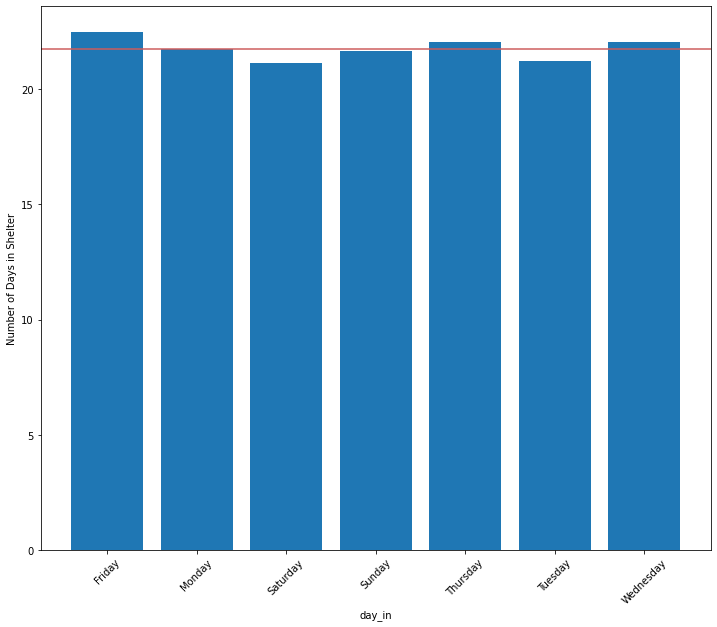

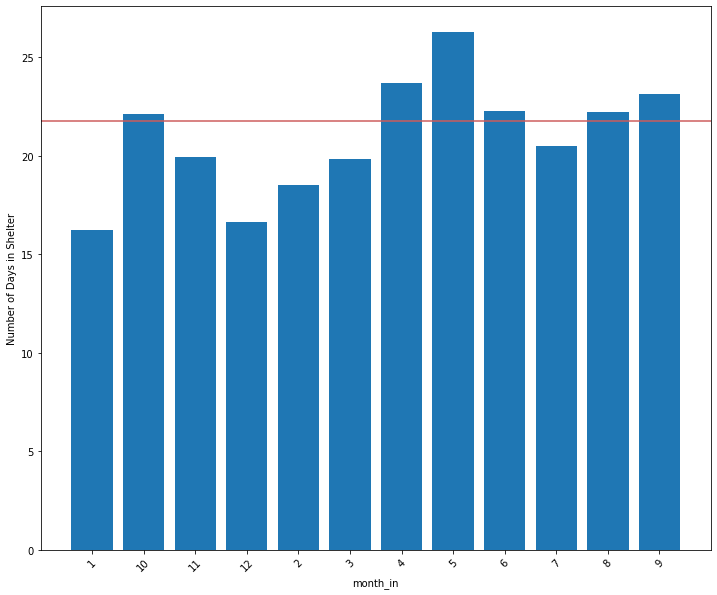

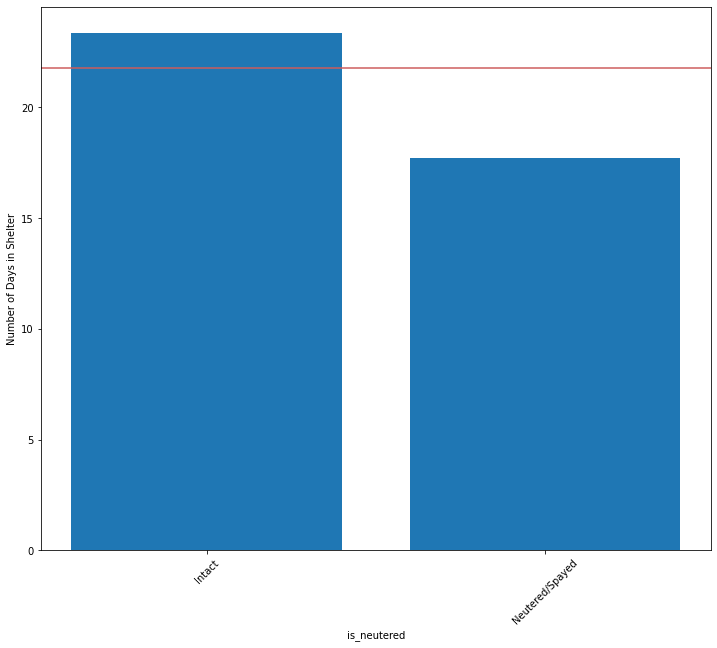

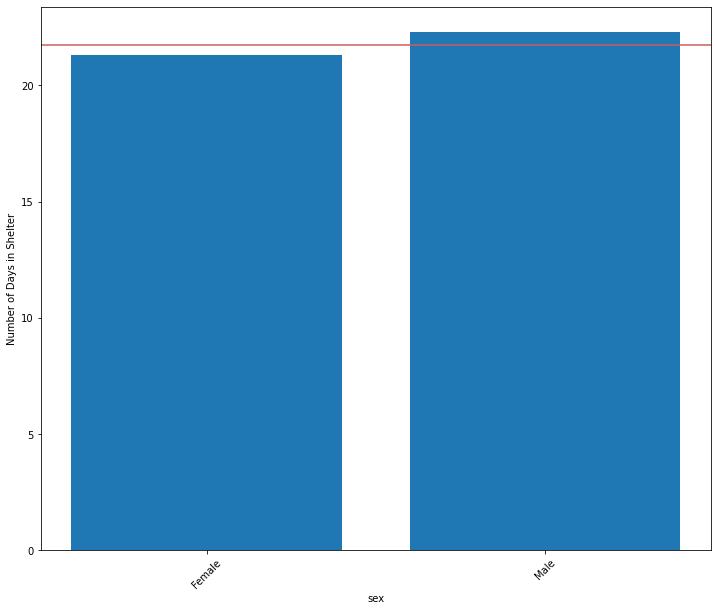

In [51]:
for col in interest_cols:
    col_series = cat['days_in_shelter'].groupby(cat[col]).mean()
    index = [index for index,value in col_series.items()]
    mean = [value for index,value in col_series.items()]
    plt.figure(figsize=(12,10))
    plt.bar(index,mean)
    plt.xticks(rotation=45)
    plt.axhline(y=cat['days_in_shelter'].mean(), color='indianred')
    plt.xlabel(col)
    plt.ylabel('Number of Days in Shelter')
    plt.show();

### Getting Dummies

In [52]:
dog_dummied = pd.get_dummies(dog)

In [53]:
cat_dummied = pd.get_dummies(cat)

# III. Modeling

### DOG

In [54]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [55]:
predictions = np.mean(dog['days_in_shelter'])
rmse(predictions, y_test)

40.43897621591622

**Train Test Split**

In [56]:
features = (dog_dummied.drop(columns = ['days_in_shelter']).columns)
X = dog_dummied[features]
y = dog_dummied['days_in_shelter']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [59]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [62]:
#Baseline
baseline_preds = np.mean(dog['days_in_shelter'])

In [65]:
#RIDGE
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
ridge_preds = ridge.predict(X_test_sc)

In [66]:
#LASSO
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
lasso_preds = lasso.predict(X_test_sc)

In [67]:
#ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_sc, y_train)
elastic_preds = elastic.predict(X_test_sc)

In [68]:
#RMSE scores
baseline_rmse = rmse(baseline_preds, y_test)
ridge_rmse = rmse(ridge_preds, y_test)
lasso_rmse = rmse(lasso_preds, y_test)
elastic_rmse = rmse(elastic_preds, y_test)

In [69]:
print(" Baseline ".center(18, "="))
print(f'RMSE: {baseline_rmse}')
print()
print(" Ridge ".center(18, "="))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(f'RMSE: {ridge_rmse}')
print()
print(" Lasso  ".center(18, "="))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(f'RMSE: {lasso_rmse}')
print()
print(" ElasticNet ".center(18, "="))
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))
print(f'RMSE: {elastic_rmse}')

==== Baseline ====
RMSE: 42.09916085399067

===== Ridge ======
-0.04245038615711194
-0.04169934605060455
RMSE: 40.867779008446604

===== Lasso  =====
0.0020093350146229705
0.0030598407268545014
RMSE: 41.244045033901436

=== ElasticNet ===
0.0036809753242258436
0.004634477017988581
RMSE: 41.186944715585895


In [78]:
coef = (dict(list(zip(X_train.columns, ridge.coef_))))
{k: v for k, v in sorted(coef.items(), key=lambda item: item[1])}

{'breed_chihuahua shorthair mix': -1.553258313530735,
 'intake_type_Public Assist': -1.3647405827100851,
 'is_neutered_Neutered/Spayed': -1.1646545820897596,
 'intake_condition_Normal': -1.1013312514053928,
 'breed_shih mix tzu': -1.0418084627407467,
 'breed_poodle miniature mix': -0.9546700318448023,
 'prev_ret_to_owner': -0.9425650608783799,
 'breed_mix dachshund': -0.8671112584790988,
 'intake_type_Euthanasia Request': -0.858661303534025,
 'breed_schnauzer miniature mix': -0.8158921173171111,
 'breed_chihuahua shorthair': -0.7790575023061567,
 'breed_yorkshire mix terrier': -0.7681752162070494,
 'intake_type_Stray': -0.7566164467695491,
 'breed_shih tzu': -0.7014271188174634,
 'breed_chihuahua longhair mix': -0.6859536786972152,
 'breed_siberian husky': -0.6612029141567256,
 'color_yellow': -0.6382148185838441,
 'breed_rat mix terrier': -0.6189513780498626,
 'breed_shepherd german': -0.6148614931070278,
 'prev_transfer': -0.6105316490031057,
 'breed_spaniel mix cocker': -0.601767119

### CAT

**Train Test Split**

In [79]:
features = (cat_dummied.drop(columns = ['days_in_shelter']).columns)
X = cat_dummied[features]
y = cat_dummied['days_in_shelter']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [81]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [82]:
#Baseline
baseline_preds = np.mean(dog['days_in_shelter'])

In [83]:
#RIDGE
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
ridge_preds = ridge.predict(X_test_sc)

In [84]:
#LASSO
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
lasso_preds = lasso.predict(X_test_sc)

In [85]:
#ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_sc, y_train)
elastic_preds = elastic.predict(X_test_sc)

In [86]:
#RMSE scores
baseline_rmse = rmse(baseline_preds, y_test)
ridge_rmse = rmse(ridge_preds, y_test)
lasso_rmse = rmse(lasso_preds, y_test)
elastic_rmse = rmse(elastic_preds, y_test)

In [87]:
print(" Baseline ".center(18, "="))
print(f'RMSE: {baseline_rmse}')
print()
print(" Ridge ".center(18, "="))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(f'RMSE: {ridge_rmse}')
print()
print(" Lasso  ".center(18, "="))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(f'RMSE: {lasso_rmse}')
print()
print(" ElasticNet ".center(18, "="))
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))
print(f'RMSE: {elastic_rmse}')

==== Baseline ====
RMSE: 39.824790760152446

===== Ridge ======
0.0328220965748125
0.033172092223202165
RMSE: 37.630221017024866

===== Lasso  =====
0.02987333006019921
0.028371635530315853
RMSE: 37.489137699646605

=== ElasticNet ===
0.041486391438243064
0.04056433349171862
RMSE: 37.70264399782482


# IV. Going Back... Better Columns?

In [90]:
cat.head()

,color,breed,intake_type,intake_condition,month_in,day_in,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,age_upon_intake,is_named_in,mix,sex,is_neutered,days_in_shelter
10,white black,domestic longhair mix,Stray,Normal,11,Friday,0,0,0,0,0,0,1.0,1,1,Female,Intact,3
11,brown white tabby,mix shorthair american,Stray,Normal,12,Monday,0,0,0,0,0,0,1.0,1,1,Female,Neutered/Spayed,14
16,black,domestic shorthair,Euthanasia Request,Aged,12,Saturday,0,0,0,0,0,0,1.0,1,0,Female,Neutered/Spayed,0
20,tortie point,snowshoe mix,Owner Surrender,Normal,5,Wednesday,0,0,0,0,0,0,1.0,1,1,Female,Neutered/Spayed,9
27,white black,domestic shorthair mix,Stray,Normal,12,Friday,0,0,0,0,0,0,1.0,1,1,Male,Neutered/Spayed,0


In [112]:
#According to Rover.com

bins = [0, 0.5, 2, 6, 10, 14, np.inf]
names = ['< 6 Months', '6 Months-2 Years', '2 Years-6 Years', 
         '6 Years-10 Years', '10 Years-14 Years', '14 Years+']

cat['age_type'] = pd.cut(cat['age_upon_intake'], bins, labels=names)

print(df.dtypes)

animal_type            object
color                  object
breed                  object
intake_type            object
intake_condition       object
month_in               object
day_in                 object
prev_adoption           int64
prev_transfer           int64
prev_ret_to_owner       int64
prev_rto_adopt          int64
prev_disposal           int64
prev_missing            int64
age_upon_intake       float64
is_named_in             int64
mix                     int64
sex                    object
is_neutered            object
days_in_shelter         int64
age_type             category
dtype: object


In [113]:
cat['age_type'].value_counts()

< 6 Months           29608
6 Months-2 Years     12850
2 Years-6 Years       3880
6 Years-10 Years      1417
10 Years-14 Years        0
14 Years+                0
Name: age_type, dtype: int64

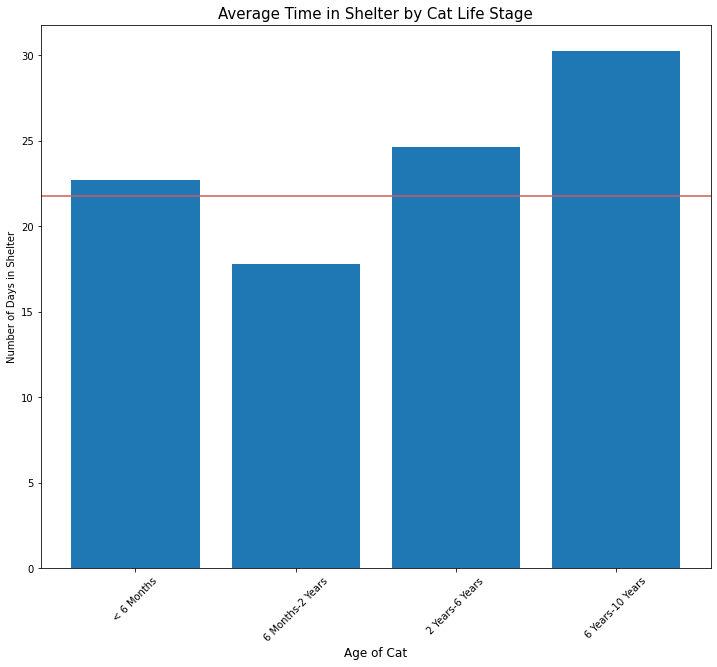

In [114]:
col_series = cat['days_in_shelter'].groupby(cat['age_type']).mean()
index = [index for index,value in col_series.items()]
mean = [value for index,value in col_series.items()]
plt.figure(figsize=(12,10))
plt.bar(index,mean)
plt.xticks(rotation=45)
plt.axhline(y=cat['days_in_shelter'].mean(), color='indianred')
plt.xlabel('Age of Cat', fontsize=12)
plt.ylabel('Number of Days in Shelter')
plt.title('Average Time in Shelter by Cat Life Stage', fontsize=15)
plt.show();

In [116]:
dog['age_type'].value_counts()

6 Months-2 Years     36143
< 6 Months           16487
2 Years-6 Years      14700
6 Years-10 Years      4597
10 Years-14 Years        0
14 Years+                0
Name: age_type, dtype: int64

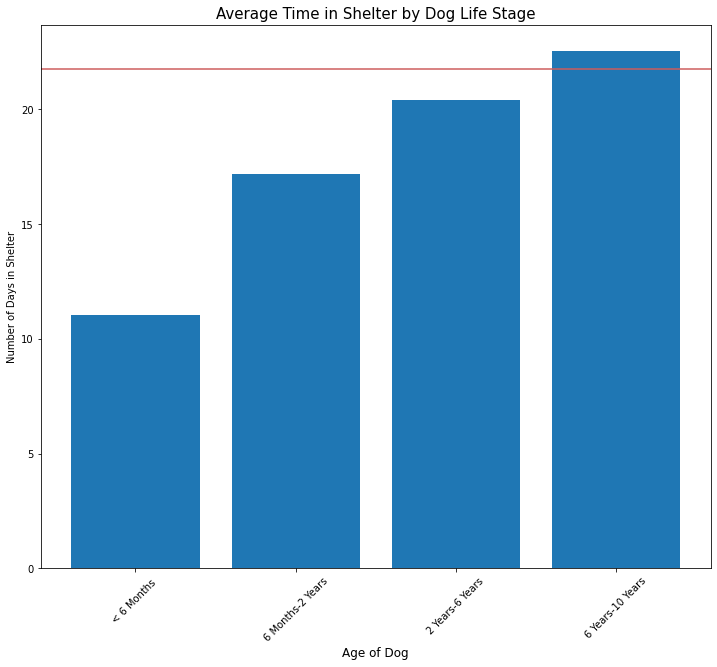

In [118]:
col_series = dog['days_in_shelter'].groupby(dog['age_type']).mean()
index = [index for index,value in col_series.items()]
mean = [value for index,value in col_series.items()]
plt.figure(figsize=(12,10))
plt.bar(index,mean)
plt.xticks(rotation=45)
plt.axhline(y=cat['days_in_shelter'].mean(), color='indianred')
plt.xlabel('Age of Dog', fontsize=12)
plt.ylabel('Number of Days in Shelter')
plt.title('Average Time in Shelter by Dog Life Stage', fontsize=15)
plt.show();

/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


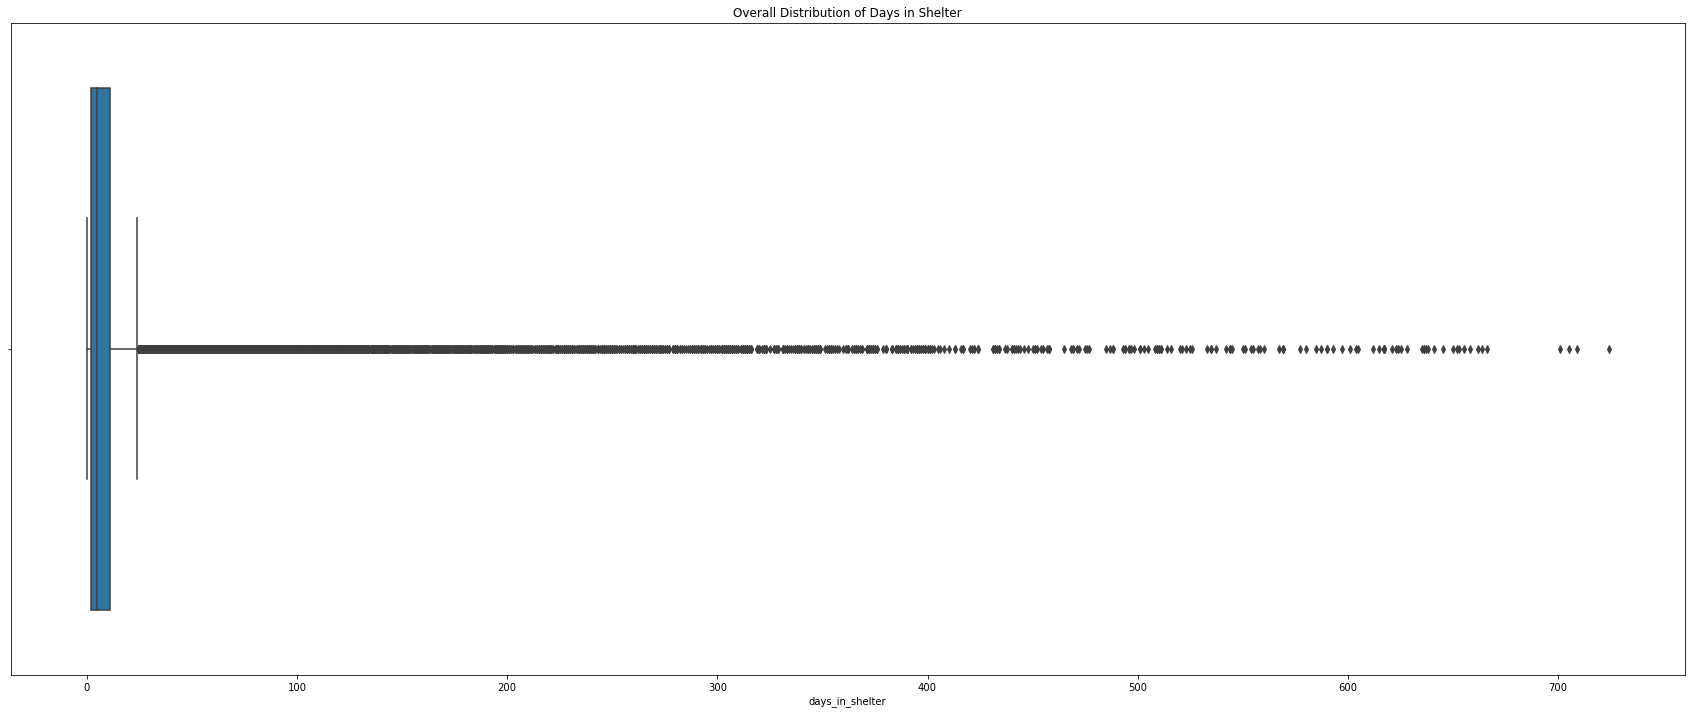

In [120]:
plt.figure(figsize=(30,12))
sns.boxplot(dog['days_in_shelter']).set(title = 'Overall Distribution of Days in Shelter')
plt.show();

/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


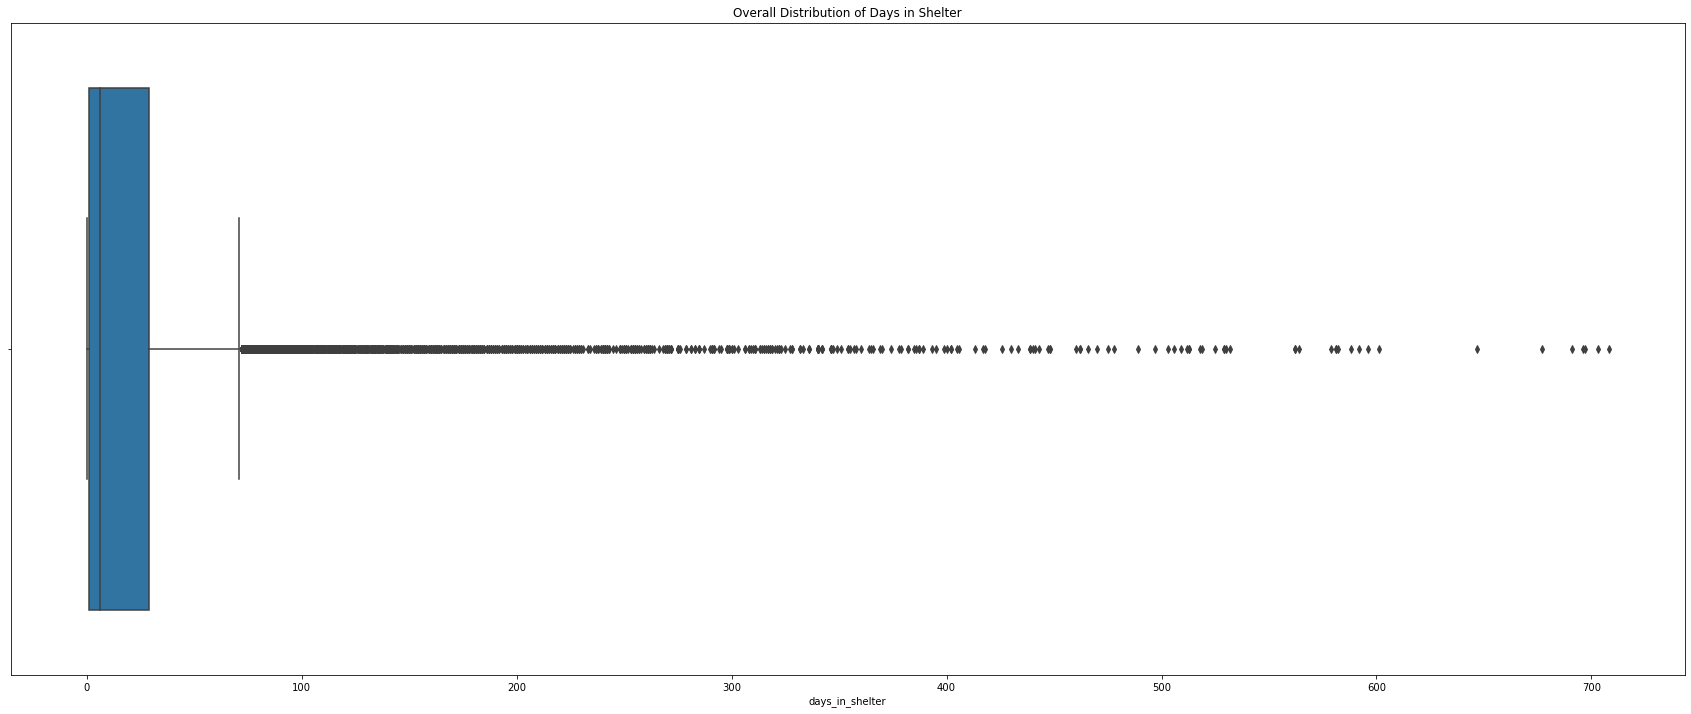

In [121]:
plt.figure(figsize=(30,12))
sns.boxplot(cat['days_in_shelter']).set(title = 'Overall Distribution of Days in Shelter')
plt.show();

In [129]:
#Removing more outliers
dog[dog['days_in_shelter']> 365].shape

(223, 19)

Therefore, dropping 223 outlier dogs.

In [131]:
dog_rm = dog.drop(dog.index[(dog['days_in_shelter']> 365)], axis=0)

In [132]:
cat[cat['days_in_shelter']> 365].shape

(75, 19)

Therefore, dropping 75 outlier cats.

In [133]:
cat_rm = cat.drop(cat.index[(cat['days_in_shelter']> 365)], axis=0)

In [134]:
dog_rm.shape

(71704, 19)

In [135]:
cat_rm.shape

(47680, 19)

In [136]:
dog_rm_dummied = pd.get_dummies(dog_rm)
cat_rm_dummied = pd.get_dummies(cat_rm)

### DOG

**Train Test Split**

In [137]:
features = (dog_rm_dummied.drop(columns = ['days_in_shelter']).columns)
X = dog_rm_dummied[features]
y = dog_rm_dummied['days_in_shelter']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [139]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [146]:
#Baseline
baseline_preds = np.mean(dog_rm_dummied['days_in_shelter'])

In [141]:
#RIDGE
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
ridge_preds = ridge.predict(X_test_sc)

In [142]:
#LASSO
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
lasso_preds = lasso.predict(X_test_sc)

In [143]:
#ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_sc, y_train)
elastic_preds = elastic.predict(X_test_sc)

In [144]:
#RMSE scores
baseline_rmse = rmse(baseline_preds, y_test)
ridge_rmse = rmse(ridge_preds, y_test)
lasso_rmse = rmse(lasso_preds, y_test)
elastic_rmse = rmse(elastic_preds, y_test)

In [147]:
print(" Baseline ".center(18, "="))
print(f'RMSE: {baseline_rmse}')
print()
print(" Ridge ".center(18, "="))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(f'RMSE: {ridge_rmse}')
print()
print(" Lasso  ".center(18, "="))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(f'RMSE: {lasso_rmse}')
print()
print(" ElasticNet ".center(18, "="))
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))
print(f'RMSE: {elastic_rmse}')

==== Baseline ====
RMSE: 33.917644687122596

===== Ridge ======
-0.01966760358574371
-0.01708503570923048
RMSE: 33.12222067561731

===== Lasso  =====
0.009322957176314928
0.009516131140274275
RMSE: 33.18306221635016

=== ElasticNet ===
0.012669907758165566
0.013281439019123265
RMSE: 33.1173049610195


### CAT

**Train Test Split**

In [148]:
features = (cat_rm_dummied.drop(columns = ['days_in_shelter']).columns)
X = cat_rm_dummied[features]
y = cat_rm_dummied['days_in_shelter']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [150]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [151]:
#Baseline
baseline_preds = np.mean(cat_rm_dummied['days_in_shelter'])

In [152]:
#RIDGE
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
ridge_preds = ridge.predict(X_test_sc)

In [153]:
#LASSO
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
lasso_preds = lasso.predict(X_test_sc)

In [154]:
#ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_sc, y_train)
elastic_preds = elastic.predict(X_test_sc)

In [155]:
#RMSE scores
baseline_rmse = rmse(baseline_preds, y_test)
ridge_rmse = rmse(ridge_preds, y_test)
lasso_rmse = rmse(lasso_preds, y_test)
elastic_rmse = rmse(elastic_preds, y_test)

In [156]:
print(" Baseline ".center(18, "="))
print(f'RMSE: {baseline_rmse}')
print()
print(" Ridge ".center(18, "="))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(f'RMSE: {ridge_rmse}')
print()
print(" Lasso  ".center(18, "="))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(f'RMSE: {lasso_rmse}')
print()
print(" ElasticNet ".center(18, "="))
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))
print(f'RMSE: {elastic_rmse}')

==== Baseline ====
RMSE: 34.762622286269114

===== Ridge ======
0.06481183383360789
0.06635898351943204
RMSE: 32.2830328259416

===== Lasso  =====
0.037607704063321146
0.03885745969735477
RMSE: 32.40833855957491

=== ElasticNet ===
0.05291457728557469
0.0541279373741449
RMSE: 32.63506284171472


In [157]:
coef = (dict(list(zip(X_train.columns, ridge.coef_))))
{k: v for k, v in sorted(coef.items(), key=lambda item: item[1])}

{'is_neutered_Neutered/Spayed': -1.7211468247311308,
 'month_in_1': -1.279898549551593,
 'age_type_6 Months-2 Years': -1.1814357846177201,
 'month_in_12': -0.9444859041414011,
 'age_upon_intake': -0.7092476091508128,
 'color_gray tabby': -0.7047054740397288,
 'color_orange white': -0.6288823977596036,
 'color_gray': -0.6041916040177855,
 'month_in_11': -0.5512601180027058,
 'prev_adoption': -0.5469355473422017,
 'color_seal point': -0.5106402162103197,
 'color_orange tabby': -0.5004611424970612,
 'mix': -0.48886986983699066,
 'intake_condition_Sick': -0.43896635361540554,
 'color_gray white': -0.43499520202645336,
 'sex_Male': -0.43422735247117955,
 'color_blue': -0.4221131160427695,
 'color_orange': -0.4137574254284903,
 'breed_siamese': -0.3907655905326922,
 'breed_himalayan mix': -0.3901731425250816,
 'month_in_7': -0.3639291388078046,
 'color_brown tabby black': -0.35638104329943143,
 'breed_devon rex': -0.35367239925813493,
 'breed_domestic longhair mix': -0.350072025148924,
 'int

In [158]:
cat['intake_type'].value_counts()

Stray                 36910
Owner Surrender        9494
Public Assist          1067
Abandoned               226
Euthanasia Request       58
Name: intake_type, dtype: int64

In [163]:
cat.to_csv('katie-cat.csv', index=False)

In [164]:
dog.to_csv('katie-dog.csv', index=False)